In [4]:
##########################################################
################ Load Packages / libraries ############### 
##########################################################
import os 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
import seaborn as sns
from sklearn.cluster import KMeans, k_means
import pypyodbc as podbc


##########################################################
############## Configure notebook settings ############### 
##########################################################
np.set_printoptions(formatter={'float_kind':'{:f}'.format}) # To change scientific numbers to float
sns.set(rc={'figure.figsize':(8,6)}) # Increases the size of sns plots


In [8]:
##########################################################
########### Connect / Retrieve from SQL Server ########### 
##########################################################

con = podbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=H510I\SQLEXPRESS;"
                     "Database=customers;"
                     "Trusted_Connection=yes;")

# Testing a query to confirm connection config
SQL_Query = pd.read_sql_query('''SELECT * FROM [dbo].[dataset]''', con)
SQL_Query.head()

d:\CompSci\Projects\kmeans-clustering\.venv\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id,age,gender,postcode,district,constituency,latitude,longitude,current_status,total_household_income,how_often_you_attend_entertaining_events_in_a_year,social_media,how_many_hours_are_you_willing_to_travel_to_attend_an_event,do_you_enjoy_adrenaline_rush_activities,are_food_areas_important_to_you,favourite_attraction,were_you_satisfied_with_the_last_event_you_attended_with_us,would_you_recommend_our_events_to_other_people,did_you_find_our_events_value_for_money
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"""50",000 to 74,"999""",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,"Somewhat agree,Somewhat Unlikely,Somewhat disa..."
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"""35",000 to 49,"999""",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,"Mostly agree,Somewhat Likely,Entirely disagree"
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.6922,-2.022295,Married with children,"""75",000 to 99,"999""",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,"Mostly agree,Mostly Unlikely,Entirely disagree"
3,4,50-59,Female,B24 0DL,Birmingham,"""Birmingham","Erdington""",52.526595,-1.822211,Married without children,"""35",000 to 49,"999""",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,"Crazy rollercoaster ride,Somewhat agree,Somewh..."
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"""100",000 to 149,"999""",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,"Entirely agree,Very Unlikely,Entirely agree"


In [11]:
# Checking for null values
SQL_Query.isnull().sum()

id                                                             0
age                                                            0
gender                                                         0
postcode                                                       0
district                                                       0
constituency                                                   0
latitude                                                       0
longitude                                                      0
current_status                                                 0
total_household_income                                         0
how_often_you_attend_entertaining_events_in_a_year             0
social_media                                                   0
how_many_hours_are_you_willing_to_travel_to_attend_an_event    0
do_you_enjoy_adrenaline_rush_activities                        0
are_food_areas_important_to_you                                0
favourite_attraction     

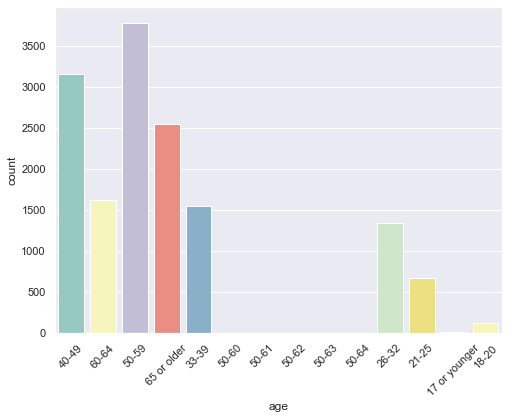

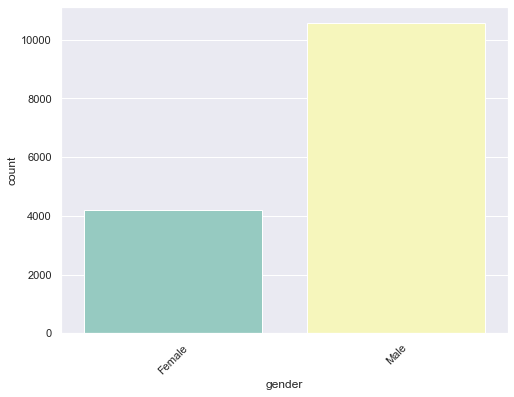

In [25]:
features = SQL_Query.columns.values
features = np.delete(features, np.where(features == 'id'))
features

for f in features:
    sns.countplot(x = f, data = SQL_Query, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.show()